In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("df_movies_with_score.csv")
df_ratings = pd.read_csv("ratings_without_timestamp.csv")

In [3]:
df.head()

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,mean,median,interactions
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,3.920930,4.0,215
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,3.431818,3.5,110
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,3.259615,3.0,52
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,2.357143,3.0,7
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,3.071429,3.0,49


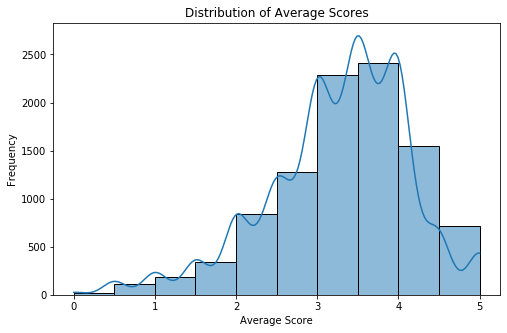

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['mean'], bins=10, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

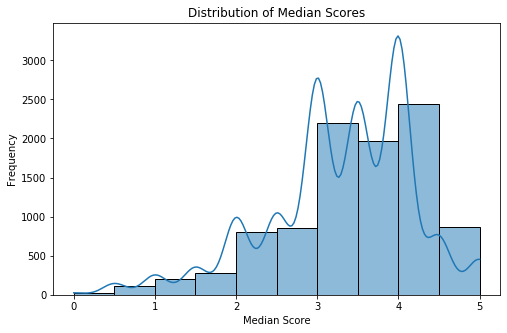

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['median'], bins=10, kde=True)
plt.title('Distribution of Median Scores')
plt.xlabel('Median Score')
plt.ylabel('Frequency')
plt.show()

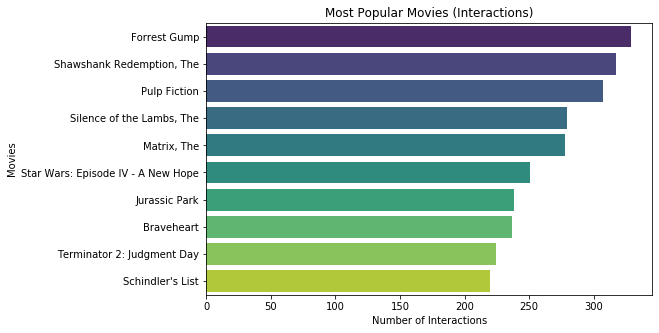

In [12]:
plt.figure(figsize=(8, 5))
popular_movies = df.sort_values(by='interactions', ascending=False)
sns.barplot(data=popular_movies[:10], x='interactions', y='title', palette='viridis')
plt.title('Most Popular Movies (Interactions)')
plt.xlabel('Number of Interactions')
plt.ylabel('Movies')
plt.show()

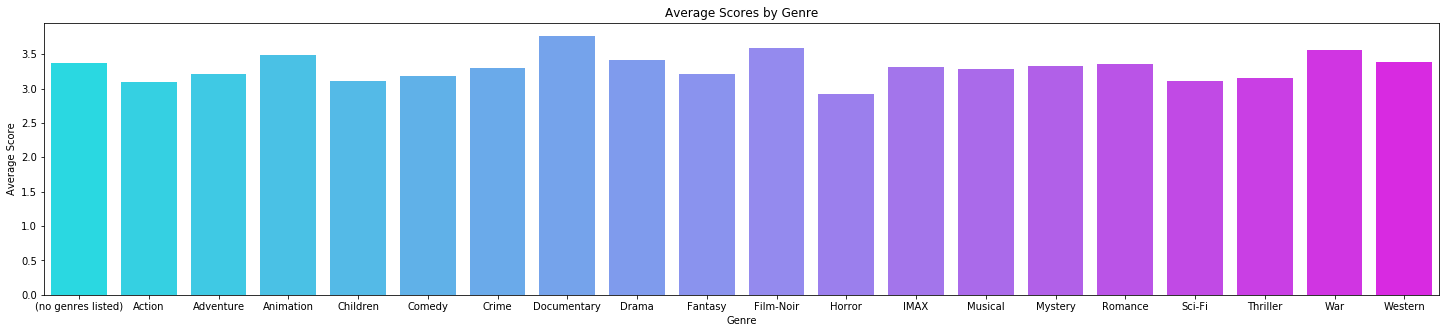

In [17]:
genres = df.drop(columns=['movieId', 'title', 'year', 'mean', 'median', 'interactions'])
genre_scores = {}
for genre in genres:
    genre_scores[genre] = df[df[genre] == 1]['mean'].mean()

plt.figure(figsize=(25, 5))
sns.barplot(x=list(genre_scores.keys()), y=list(genre_scores.values()), palette='cool')
plt.title('Average Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.show()

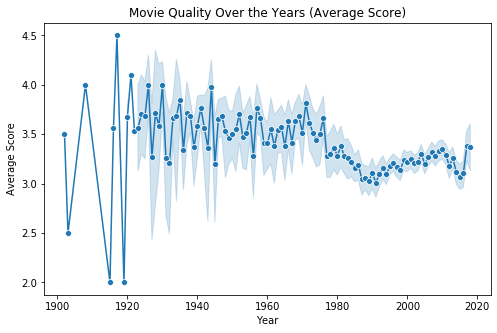

In [24]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=df[df['year'] > 0], x='year', y='mean', marker='o')
plt.title('Movie Quality Over the Years (Average Score)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

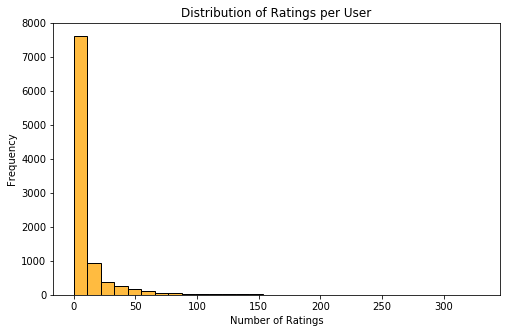

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(df['interactions'], bins=30, kde=False, color='orange')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

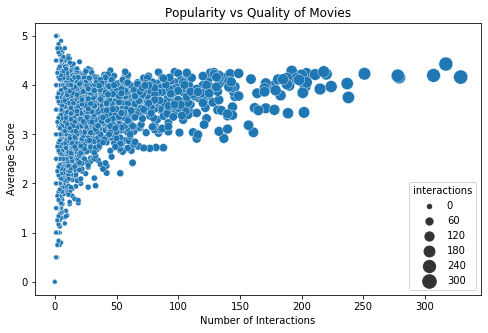

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='interactions', y='mean', hue=None, size='interactions', sizes=(20, 200))
plt.title('Popularity vs Quality of Movies')
plt.xlabel('Number of Interactions')
plt.ylabel('Average Score')
plt.show()

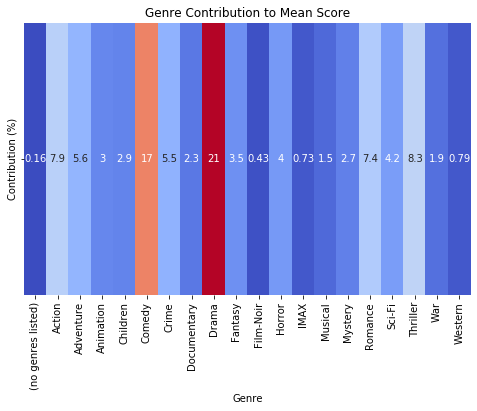

In [ ]:
genres = df.drop(columns=['movieId', 'title', 'year', 'mean', 'median', 'interactions'])

genre_contributions = genres.multiply(df['mean'], axis=0)
genre_totals = genre_contributions.sum()
genre_percentage = (genre_totals / genre_totals.sum()) * 100
genre_df = pd.DataFrame({'Genre': genre_percentage.index, 'Contribution (%)': genre_percentage.values})

plt.figure(figsize=(8, 5))
sns.heatmap(genre_df.set_index('Genre').T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Genre Contribution to Mean Score')
plt.show()